In [8]:
# Loading the cifar10 dataset
import tensorflow 
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage

In [9]:
#loading required libraries
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [ ]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

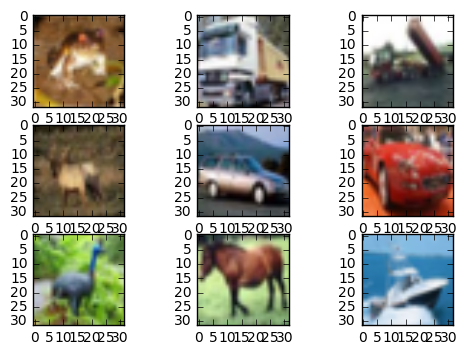

In [10]:
# load data the cifar10 data  into training and test 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(X_train[i]))
# show the plot
pyplot.show()

In [11]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [25]:
# Create the model
Conv_NN10_1layer = Sequential()
Conv_NN10_1layer.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
Conv_NN10_1layer.add(Dropout(0.2))
Conv_NN10_1layer.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
Conv_NN10_1layer.add(MaxPooling2D(pool_size=(2, 2)))
Conv_NN10_1layer.add(Flatten())
Conv_NN10_1layer.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
Conv_NN10_1layer.add(Dropout(0.5))
Conv_NN10_1layer.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 10
lrate = 0.005
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
Conv_NN10_1layer.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(Conv_NN10_1layer.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
__________

In [ ]:
# Fit the model
#Conv_NN10_1layer.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
Conv_NN10_1layer.fit(X_train, y_train, epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = Conv_NN10_1layer.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
50000/50000 [==============================] - 502s - loss: 1.4032 - acc: 0.4980     

In [ ]:
# Fit the model
#Conv_NN10_1layer.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
Conv_NN10_1layer.fit(X_train, y_train, epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = Conv_NN10_1layer.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
50000/50000 [==============================] - 1341s - loss: 0.9178 - acc: 0.6755      

In [ ]:
k=4999
n=8
scores = Conv_NN10_1layer.evaluate(X_test[k:k+n,], y_test[k:k+n,], verbose=0)
s=Conv_NN10_1layer.predict(X_test[k:k+n,], batch_size=64, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
for i in range(len(s)):
        for j in range(len(s[i,])):
                if s[i,j]==max(s[i,]):
                    #pyplot.subplot(330 + 1 + i)
                    pyplot.imshow(toimage(X_test[k+i,]))
                    pyplot.show()
                    print(labels[j])

In [16]:
# Create the model
Conv_NN10_multilayer = Sequential()
Conv_NN10_multilayer.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))
Conv_NN10_multilayer.add(Dropout(0.2))
Conv_NN10_multilayer.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
Conv_NN10_multilayer.add(MaxPooling2D(pool_size=(2, 2)))
Conv_NN10_multilayer.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
Conv_NN10_multilayer.add(Dropout(0.2))
Conv_NN10_multilayer.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
Conv_NN10_multilayer.add(MaxPooling2D(pool_size=(2, 2)))
Conv_NN10_multilayer.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
Conv_NN10_multilayer.add(Dropout(0.2))
Conv_NN10_multilayer.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
Conv_NN10_multilayer.add(MaxPooling2D(pool_size=(2, 2)))
Conv_NN10_multilayer.add(Flatten())
Conv_NN10_multilayer.add(Dropout(0.2))
Conv_NN10_multilayer.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
Conv_NN10_multilayer.add(Dropout(0.2))
Conv_NN10_multilayer.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
Conv_NN10_multilayer.add(Dropout(0.2))
Conv_NN10_multilayer.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 10
lrate = 0.008
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
Conv_NN10_multilayer.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(Conv_NN10_multilayer.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_12 (Dropout)         (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 16, 16)        36928     
__________

In [17]:
Conv_NN10_multilayer.fit(X_train, y_train, epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = Conv_NN10_multilayer.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
50000/50000 [==============================] - 919s - loss: 1.9911 - acc: 0.2649      

In [20]:
Conv_NN10_multilayer.fit(X_train, y_train, epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = Conv_NN10_multilayer.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
50000/50000 [==============================] - 956s - loss: 0.9926 - acc: 0.6460     

In [24]:
Conv_NN10_multilayer.fit(X_train, y_train, epochs=5, batch_size=64)
# Final evaluation of the model
scores = Conv_NN10_multilayer.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
50000/50000 [==============================] - 901s - loss: 0.7414 - acc: 0.7381     

Accuracy: 100.00%


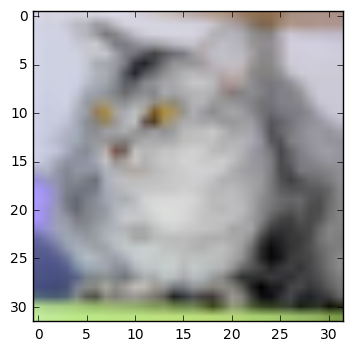

cat


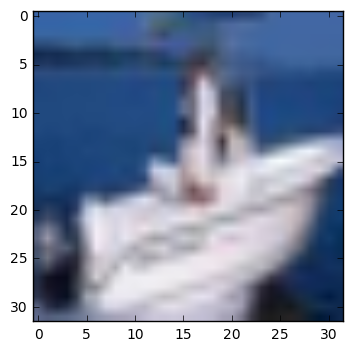

ship


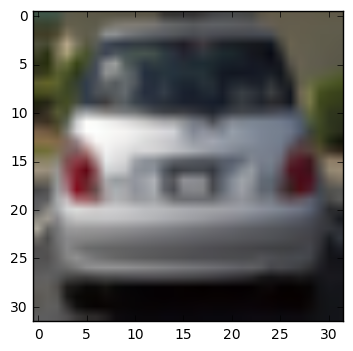

automobile


In [28]:
k=8999
n=3
scores = Conv_NN10_multilayer.evaluate(X_test[k:k+n,], y_test[k:k+n,], verbose=0)
s=Conv_NN10_multilayer.predict(X_test[k:k+n,], batch_size=64, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
for i in range(len(s)):
        for j in range(len(s[i,])):
                if s[i,j]==max(s[i,]):
                    #pyplot.subplot(330 + 1 + i)
                    pyplot.imshow(toimage(X_test[k+i,]))
                    pyplot.show()
                    print(labels[j])